In [46]:
import numpy as np
import matplotlib.pyplot as plt

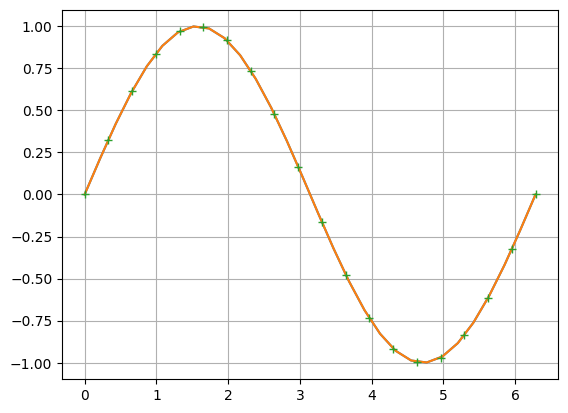

In [104]:
def Dh(Zn, Yn, Y2n):
    n = len(Zn) 
    D = np.zeros((n, n))
    D[0, ::2] = Yn
    D[0, 1::2] = Yn
    
    for k in range(1, n): 
        for j in range(n - k):
            if(j%2 == 0 and k == 1):
                D[k,j] = Y2n[j//2]
            else:
                D[k,j] = (D[ k-1, j+ 1] - D[k-1, j]) / (Zn[j + k] - Zn[j])

    return D

def polinomio_hermite(x,nodes, images, images2):
    zi = np.zeros(2*len(nodes))
    zi[::2] = nodes
    zi[1::2] = nodes



    D = Dh(zi,images, images2)
    result = images[0]
    prod = 1
    for k in range(1, len(zi)):
        prod *= (x - zi[k-1])
        result += D[k,0]*prod
    return result

nodes = np.linspace(0, 2*np.pi, 20)
images = np.sin(nodes)
images2 = np.cos(nodes)


x = np.linspace(0,2* np.pi, 30)
values = []
for value in x:
    values.append(polinomio_hermite(value,nodes,images, images2))

plt.plot(x,values)
plt.plot(x,np.sin(x))
plt.plot(nodes, images, '+')
plt.grid()